In [89]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

# Problem Statement
### The problem is to determine the healthiness score of a soda. The score is determined by the amount of sugar and the amount of caffeine in the soda. The score is determined by the following rules:
- If the sugar content is high and the caffeine content is high, the healthiness score is low.
- If the sugar content is low and the caffeine content is low, the healthiness score is high.
- If the sugar content is high and the caffeine content is low, the healthiness score is medium.
- If the sugar content is low and the caffeine content is high, the healthiness score is medium.
- If the sugar content is medium and the caffeine content is medium, the healthiness score is medium.
- If the sugar content is high and the caffeine content is medium, the healthiness score is low.
- If the sugar content is medium and the caffeine content is high, the healthiness score is low.
- If the sugar content is low and the caffeine content is medium, the healthiness score is high.

In [61]:
sugar_content = ctrl.Antecedent(np.arange(0, 100, 1), 'Sugar Content')
caffeine_content = ctrl.Antecedent(np.arange(0, 100, 1), 'Caffeine Content')
healthiness_score = ctrl.Consequent(np.arange(0, 1, 0.1), 'Healthy')

In [62]:
sugar_content['good'] = fuzz.trimf(sugar_content.universe, [0, 0, 50])
sugar_content['average'] = fuzz.trimf(sugar_content.universe, [30, 50, 70])
sugar_content['poor'] = fuzz.trimf(sugar_content.universe, [50, 100, 100])

caffeine_content['good'] = fuzz.trimf(caffeine_content.universe, [0, 0, 50])
caffeine_content['average'] = fuzz.trimf(caffeine_content.universe, [30, 50, 70])
caffeine_content['poor'] = fuzz.trimf(caffeine_content.universe, [50, 100, 100])

healthiness_score['healthy'] = fuzz.trimf(healthiness_score.universe, [0, 0, 0.5])
healthiness_score['unhealthy'] = fuzz.trimf(healthiness_score.universe, [0.5, 1.0, 1.0])

In [79]:
rule1 = ctrl.Rule(sugar_content['poor'] & caffeine_content['poor'], healthiness_score['unhealthy'])
rule2 = ctrl.Rule(sugar_content['average'] & caffeine_content['average'], healthiness_score['unhealthy'])
rule3 = ctrl.Rule(sugar_content['good'] & caffeine_content['good'], healthiness_score['healthy'])
rule4 = ctrl.Rule(sugar_content['good'] & caffeine_content['average'], healthiness_score['healthy'])
rule5 = ctrl.Rule(sugar_content['average'] & caffeine_content['good'], healthiness_score['healthy'])
rule6 = ctrl.Rule(sugar_content['poor'] & caffeine_content['good'], healthiness_score['unhealthy'])
rule7 = ctrl.Rule(sugar_content['good'] & caffeine_content['poor'], healthiness_score['unhealthy'])
rule8 = ctrl.Rule(sugar_content['average'] & caffeine_content['poor'], healthiness_score['healthy'])
rule9 = ctrl.Rule(sugar_content['poor'] & caffeine_content['average'], healthiness_score['unhealthy'])
rule10 = ctrl.Rule(sugar_content['average'] & caffeine_content['poor'], healthiness_score['unhealthy'])

In [80]:
healthiness_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
healthiness = ctrl.ControlSystemSimulation(healthiness_ctrl)

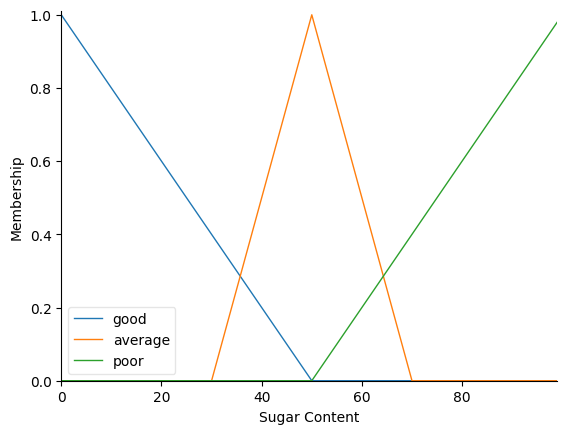

In [81]:
sugar_content.view()

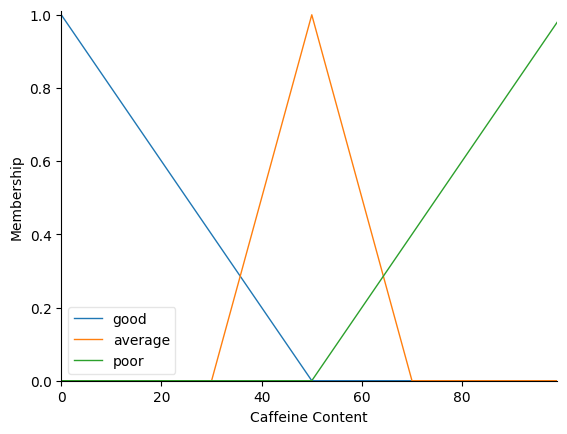

In [82]:
caffeine_content.view()

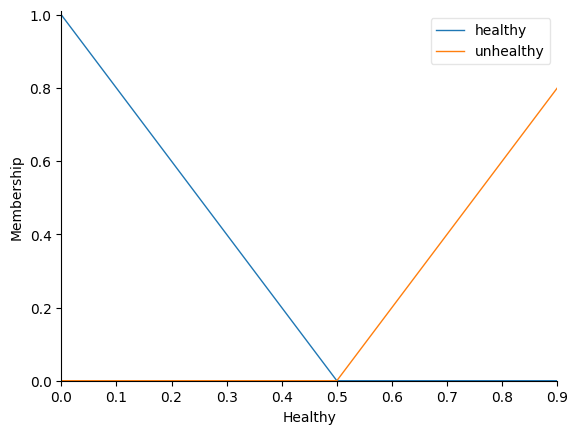

In [83]:
healthiness_score.view()

In [84]:
healthiness.input['Sugar Content'] = 80
healthiness.input['Caffeine Content'] = 0
healthiness.compute()

0.7599999999999999


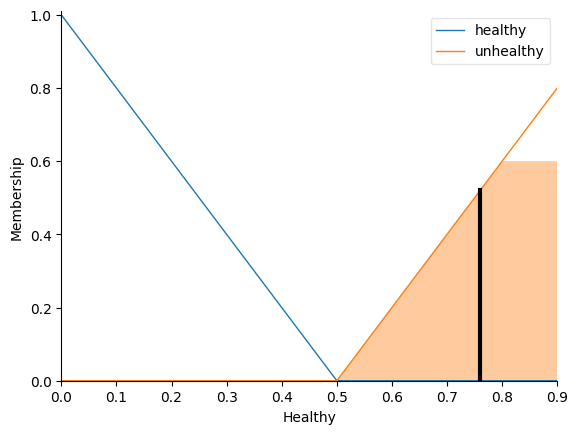

In [85]:
print(healthiness.output['Healthy'])
healthiness_score.view(sim=healthiness)

In [95]:
computed = {
    "sugar": [],
    "caffeine": [],
    "isHealthy": []
}
for i in range(100):
    for j in range(100):
        healthiness.input['Sugar Content'] = i
        healthiness.input['Caffeine Content'] = j
        healthiness.compute()
        computed["sugar"].append(i)
        computed["caffeine"].append(j)
        computed["isHealthy"].append(1 if healthiness.output['Healthy'] < 0.5 else 0)

In [96]:
data = pd.DataFrame(computed)

In [97]:
data.describe()

,sugar,caffeine,isHealthy
count,10000.000000,10000.000000,10000.000000
mean,49.500000,49.500000,0.494800
std,28.867513,28.867513,0.499998
min,0.000000,0.000000,0.000000
25%,24.750000,24.750000,0.000000
50%,49.500000,49.500000,0.000000
75%,74.250000,74.250000,1.000000
max,99.000000,99.000000,1.000000


In [98]:
data.head()

,sugar,caffeine,isHealthy
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


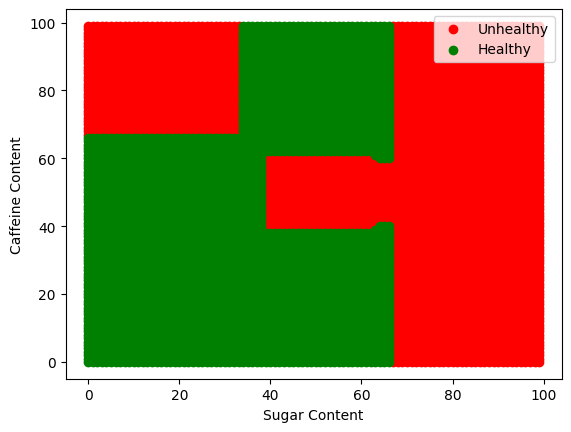

In [105]:
from matplotlib import pyplot as plt

unhealthy = data[data["isHealthy"] == 0]
healthy = data[data["isHealthy"] == 1]
plt.scatter(unhealthy["sugar"], unhealthy["caffeine"], c='r', label='Unhealthy')
plt.scatter(healthy["sugar"], healthy["caffeine"], c='g', label='Healthy')
plt.xlabel("Sugar Content")
plt.ylabel("Caffeine Content")
plt.legend()
plt.show()